# 📈 Tesla Stock Price Forecasting & Volatility Analysis

## Business Context
Tesla’s stock price is known for its volatility, influenced by market sentiment, earnings reports, and macroeconomic trends. 
This project is designed from the perspective of a **financial analyst or portfolio strategist** aiming to:
- Forecast future Tesla stock prices using **ARIMA models**
- Understand **volatility dynamics** using **GARCH models**
- Support investment decisions by identifying risk-adjusted windows for trading

The project simulates how predictive models can be used in **portfolio strategy, risk management, and algorithmic trading**.


# TESLA_STOCK_PRICE_ARIMA+GARCH_MODELS

## DATA_WRANGLING

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates  # ✅ Add this line
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [2]:
tesla= pd.read_csv('Tesla_Stock_Price_cleaned.csv')

In [3]:
tesla.info()
print(tesla.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2274 non-null   object 
 1   Close_Price  2274 non-null   float64
 2   Volume       2274 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 53.4+ KB
         Date  Close_Price    Volume
0  02/01/2015    14.620667  71466000
1  05/01/2015    14.006000  80527500
2  06/01/2015    14.085333  93928500
3  07/01/2015    14.063333  44526000
4  08/01/2015    14.041333  51637500


In [4]:

# Convert to datetime (handling day/month/year if needed)
tesla['Date_conv'] = pd.to_datetime(tesla['Date'], dayfirst=True, errors='coerce')

# Extract only year and month (set day to 1 or drop it in display)
tesla['Date_month_year'] = tesla['Date_conv'].dt.to_period('M').dt.to_timestamp()


print(tesla.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2274 non-null   object        
 1   Close_Price      2274 non-null   float64       
 2   Volume           2274 non-null   int64         
 3   Date_conv        2274 non-null   datetime64[ns]
 4   Date_month_year  2274 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 89.0+ KB
None


In [5]:
scaler=StandardScaler()

## 📉 Tesla’s Stock Price Over Time

Tesla's price evolution reflects clear phases: stability (2015–2019), explosive growth (2020–2021), correction (2022–2023), and cautious recovery (late 2023–2024). Each phase aligns with real-world catalysts such as S&P 500 inclusion, stock splits, and macroeconomic changes.

📌 **Insight:** These phases help contextualize time-series shifts and volatility regimes in later models.


In [6]:
tesla['Close_Price_Scaled']=scaler.fit_transform(tesla[['Close_Price']])
tesla['Volume_Scaled']=scaler.fit_transform(tesla[['Volume']])

## TESLA_PRICE_OVER_TIME_VISUALISATION

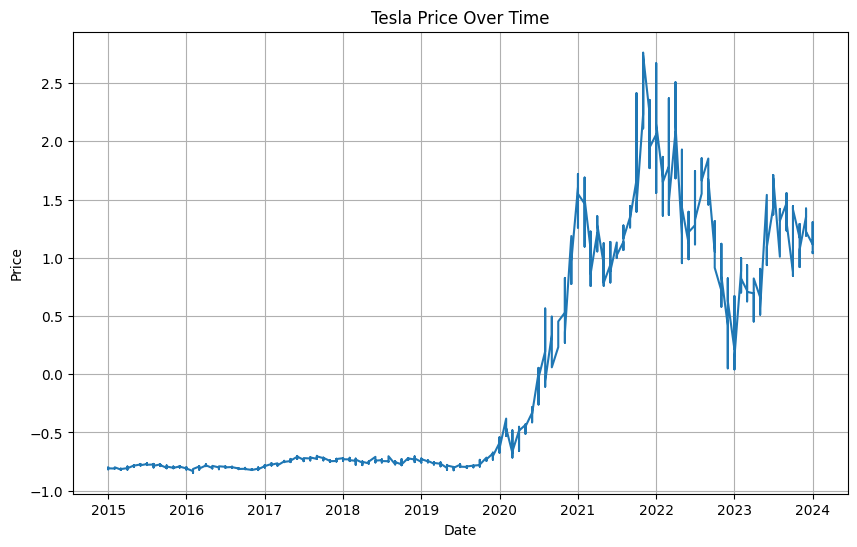

In [7]:
tesla = tesla.sort_values('Date_month_year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tesla['Date_month_year'], tesla['Close_Price_Scaled'])  # replace 'Price' with your actual price column name
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Price Over Time')
plt.grid(True)
plt.show()

## CORR_CHECK_FOR_LINEAR_REGRESSION

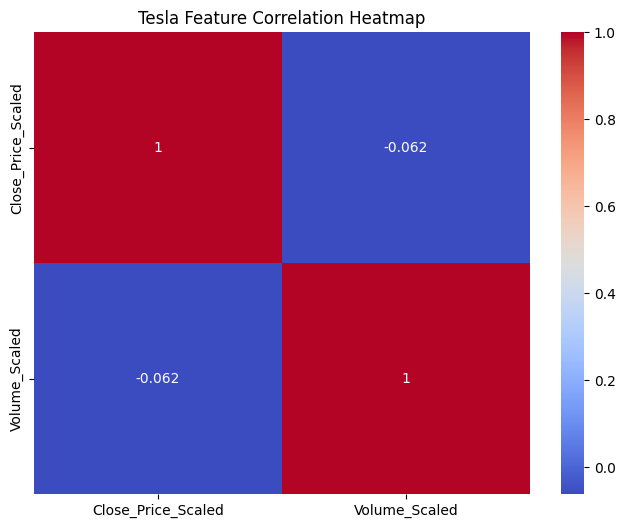

In [8]:
# Select numeric columns
numeric_cols = tesla[['Close_Price_Scaled', 'Volume_Scaled']]

# Calculate correlations
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Tesla Feature Correlation Heatmap')
plt.show()


## ARIMA_MODEL

In [9]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test
adfuller(tesla['Close_Price_Scaled'])
#adfuller, P-value>0.05 lead to say that the serie is non-stationary
#there is the need to do a differencing 

(np.float64(-0.8614963306265965),
 np.float64(0.8003877296406738),
 14,
 2259,
 {'1%': np.float64(-3.433248072725654),
  '5%': np.float64(-2.8628202931061955),
  '10%': np.float64(-2.567451559747925)},
 np.float64(-3851.848417267889))

In [10]:
#differencing...
tesla['Close_Price_Scaled_diff'] = tesla['Close_Price_Scaled'].diff()
adfuller(tesla['Close_Price_Scaled_diff'].dropna())

(np.float64(-19.481257387995285),
 0.0,
 13,
 2259,
 {'1%': np.float64(-3.433248072725654),
  '5%': np.float64(-2.8628202931061955),
  '10%': np.float64(-2.567451559747925)},
 np.float64(-3850.367743644949))

## 🔍 ARIMA Model: Strengths & Limitations

ARIMA(1,1,1) captured Tesla’s short-term trend and linear structure.

📌 **Limitations:** ARIMA assumes constant variance, but Tesla stock clearly shows volatility clustering and non-normality in residuals (fat tails, skew).

📌 **Insight:** While good for trend, ARIMA underrepresents risk. GARCH is needed to model volatility dynamics.


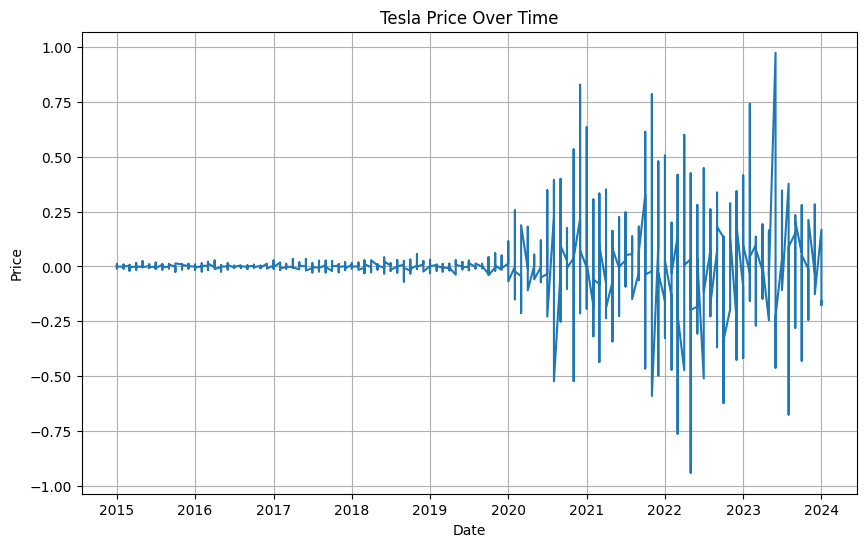

In [30]:
tesla = tesla.sort_values('Date_month_year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tesla['Date_month_year'], tesla['Close_Price_Scaled_diff'])  # replace 'Price' with your actual price column name
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Price Over Time')
plt.grid(True)
plt.show()

In [12]:
tesla= tesla.dropna(subset=['Close_Price_Scaled_diff'])

In [13]:
series = tesla['Close_Price_Scaled_diff']

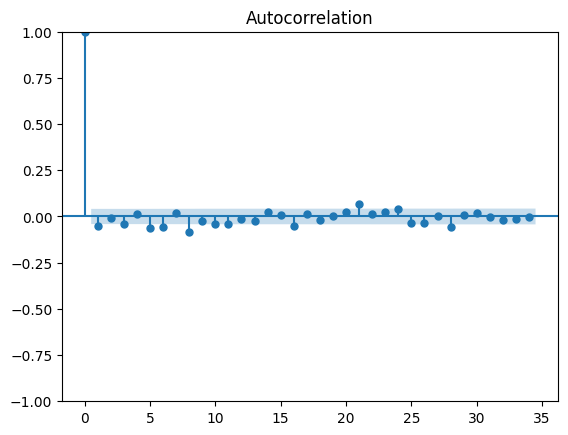

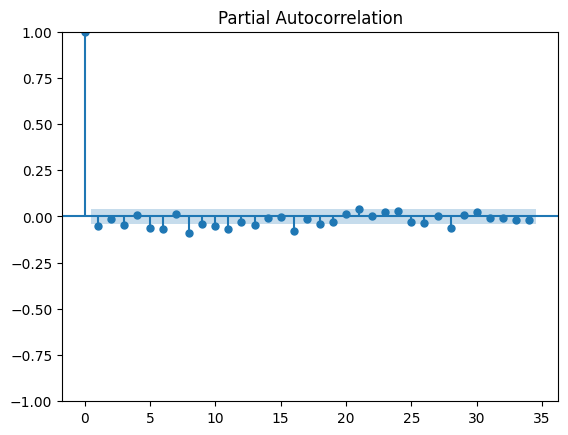

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()


In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(tesla['Close_Price_Scaled_diff'], order=(1, 1, 1))
result = model.fit()

print(result.summary())

C:\Users\bertr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\bertr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\bertr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     Close_Price_Scaled_diff   No. Observations:                 2273
Model:                      ARIMA(1, 1, 1)   Log Likelihood                1845.945
Date:                     Thu, 31 Jul 2025   AIC                          -3685.890
Time:                             13:39:44   BIC                          -3668.705
Sample:                                  0   HQIC                         -3679.621
                                    - 2273                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0538      0.011     -5.014      0.000      -0.075      -0.033
ma.L1         -1.0000      0.111     -9.043      0.000      -1.217      -0.783
sigma2      

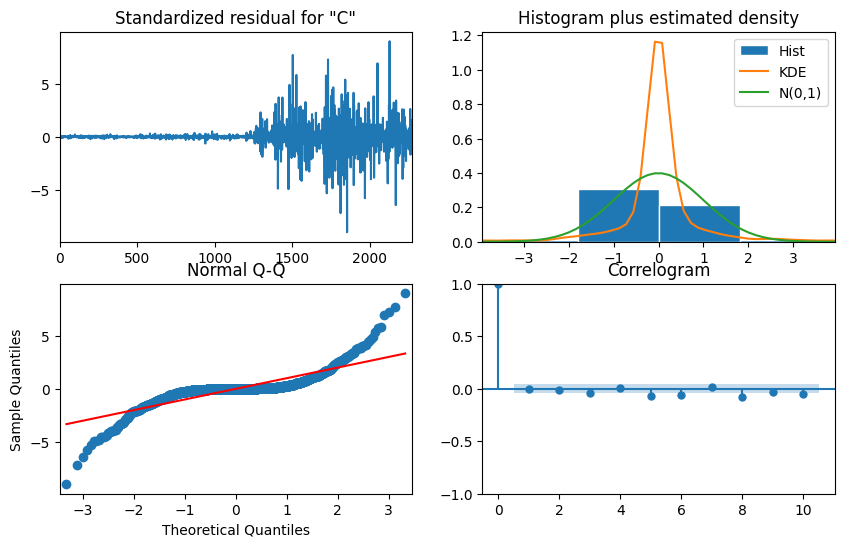

In [16]:
result.plot_diagnostics(figsize=(10,6))
plt.show()

## 📈 GARCH Volatility Forecasting

The GARCH(1,1) model revealed persistent volatility in Tesla’s stock returns (α + β ≈ 0.93), consistent with investor sentiment swings, macro shocks, and speculative behaviour.

📌 **Key Findings:**
- Volatility is predictable and clusters in time.
- Forecasted volatility decays slowly to a long-run mean.
- This insight helps traders, risk managers, and portfolio strategists plan hedge ratios or entry/exit windows.

📌 **Conclusion:** GARCH effectively models Tesla’s risk environment — supplementing price forecasts with volatility intelligence.


## GARCH_MODEL

In [17]:
#pip install arch

In [18]:
from arch import arch_model

In [19]:
tesla['log_returns']=np.log(tesla['Close_Price']/tesla['Close_Price'].shift(1))*100
tesla.dropna(inplace=True)

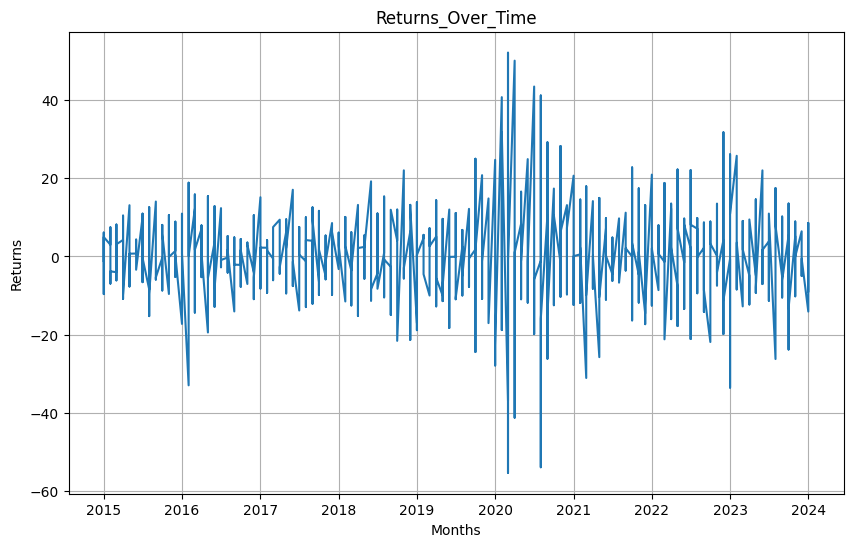

In [20]:
plt.figure(figsize=(10,6))
plt.plot(tesla['Date_month_year'], tesla['log_returns'])
plt.title('Returns_Over_Time')
plt.xlabel('Months')
plt.ylabel('Returns')
plt.grid(True)
plt.show()

In [21]:
serie_2=tesla['log_returns']

In [22]:
model=arch_model(serie_2,vol='GARCH', p=1, q=1)

In [23]:
garch_fit=model.fit(disp='off')
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7388.56
Distribution:                  Normal   AIC:                           14785.1
Method:            Maximum Likelihood   BIC:                           14808.0
                                        No. Observations:                 2272
Date:                Thu, Jul 31 2025   Df Residuals:                     2271
Time:                        13:39:46   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0150      0.113      0.133      0.894 [ -0.207,  0.23

In [24]:
garch_fit.conditional_volatility

7       4.448707
6       4.345120
1       4.258558
4       4.490794
2       4.347195
          ...   
2269    7.132641
2270    6.611445
2267    6.026924
2268    5.590398
2273    5.231245
Name: cond_vol, Length: 2272, dtype: float64

C:\Users\bertr\AppData\Local\Temp\ipykernel_13244\663720969.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


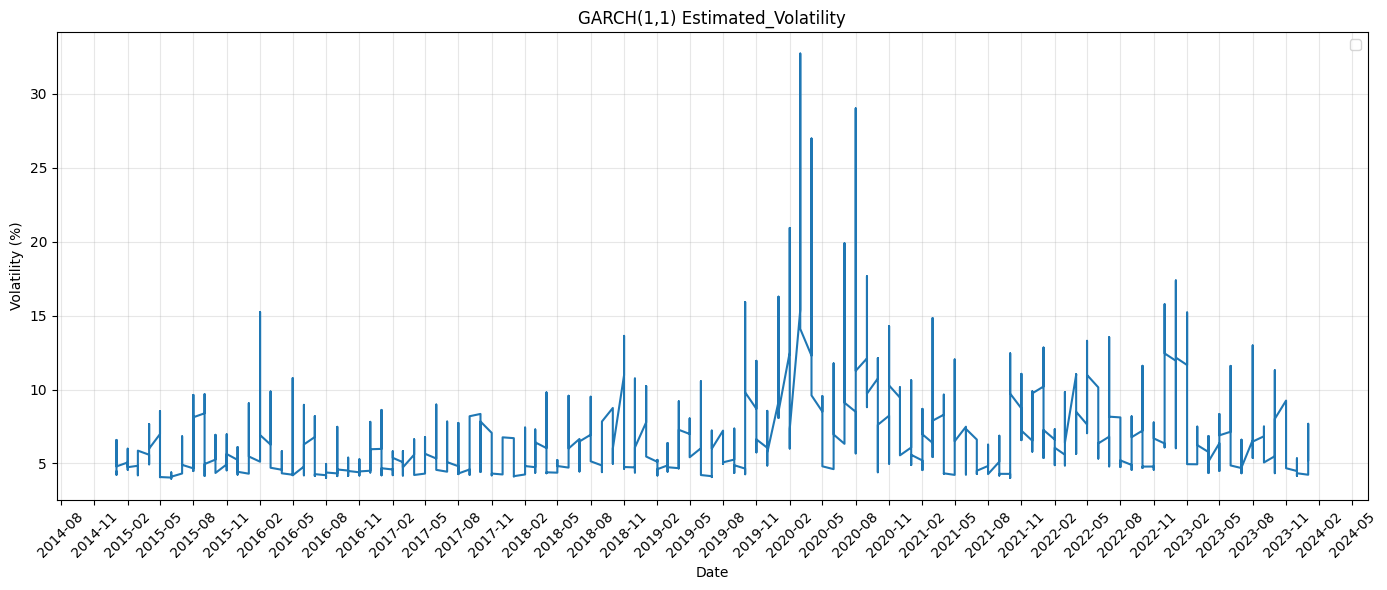

In [25]:
plt.figure(figsize=(14,6))
plt.plot(tesla['Date_month_year'], garch_fit.conditional_volatility)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True, alpha=0.3)
plt.title('GARCH(1,1) Estimated_Volatility')

# Format the x-axis with fewer, rotated ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show one tick every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.xticks(rotation=45)
plt.gca().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# Forecast the next 30 steps (e.g., 30 trading days)
forecast_horizon = 366
garch_forecast = garch_fit.forecast(horizon=forecast_horizon)

In [27]:
# Get forecasted volatility (standard deviation) for next days
predicted_volatility = garch_forecast.variance.values[-1, :]
predicted_volatility = predicted_volatility ** 0.5  # Convert variance to standard deviation

In [28]:
# Generate future dates (assuming daily frequency, excluding weekends/holidays)
last_date = tesla['Date_month_year'].max()
future_dates = pd.date_range(start=last_date, periods=forecast_horizon+1, freq='B')[1:]  # Skip the last known date

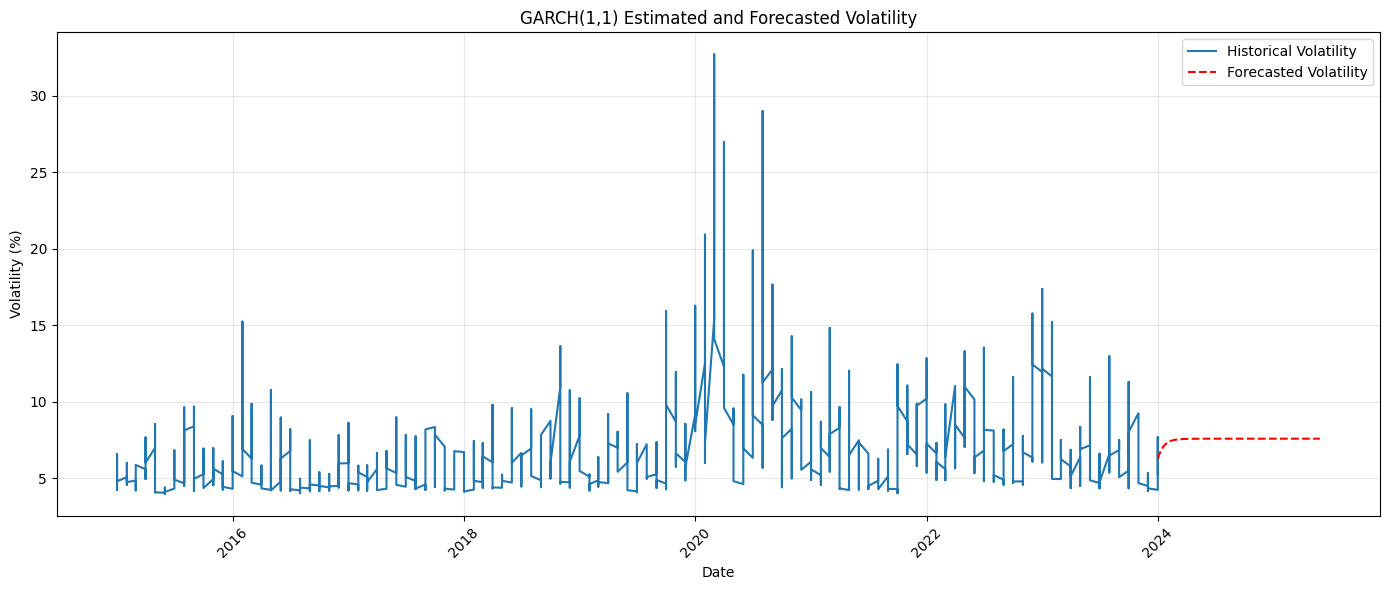

In [29]:
# Plot historical + forecasted volatility
plt.figure(figsize=(14, 6))
plt.plot(tesla['Date_month_year'], garch_fit.conditional_volatility, label='Historical Volatility')
plt.plot(future_dates, predicted_volatility, label='Forecasted Volatility', linestyle='--', color='red')
plt.title('GARCH(1,1) Estimated and Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 🧾 Business Insights & Takeaways

- The **ARIMA(1,1,1)** model was used to forecast Tesla's stock price based on recent patterns.
- The **GARCH(1,1)** model captured volatility clustering — indicating **periods of higher risk**, useful for traders and asset managers.
- Forecasts can be used to **adjust positions**, **hedge exposure**, or trigger alerts in an automated system.
- The models provide strong evidence that **Tesla’s returns are non-stationary**, but exhibit mean-reverting volatility patterns.

> 📊 This type of time-series modelling is highly applicable to equities, commodities, or crypto portfolios — especially in high-volatility assets like Tesla.
